#**Sentimental Analysis of Airline Data**

##**Importing Libraries**

In [46]:
# import important modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB # classifier 

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    plot_confusion_matrix,
    roc_curve,
    roc_auc_score,
    auc
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,cross_val_score
# text preprocessing modules
from string import punctuation 
# text preprocessing modules
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re #regular expression
# Download dependency
for dependency in (
    "brown",
    "names",
    "wordnet",
    "averaged_perceptron_tagger",
    "universal_tagset",
):
    nltk.download(dependency)
nltk.download('omw-1.4')
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##**Importing Models**

In [20]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier as XGB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

##**Importing airline dataset**

In [21]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/My_colab/airline_sentiment_analysis.csv")
data = data.drop('Unnamed: 0',axis=1)
a1 = data['text'][0]

In [22]:
data['airline_sentiment'].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

##**Pre-processing and cleaning of Dataset**

In [23]:
stop_words =  stopwords.words('english')
def text_cleaning(text, remove_stop_words=True, lemmatize_words=True):
    # Clean the text, with the option to remove stop_words and to lemmatize word
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text =  re.sub(r'http\S+',' link ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
        
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if lemmatize_words:
        text = text.split()
        lemmatizer = WordNetLemmatizer() 
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
    
    # Return a list of words
    return(text)
def label_enc(text):
  return int(text == "positive")

In [24]:
data["cleaned_text"] = data["text"].apply(text_cleaning)
data["airline_sentiment"] = data["airline_sentiment"].apply(lambda text: label_enc(text))

In [25]:
data

,airline_sentiment,text,cleaned_text
0,1,@VirginAmerica plus you've added commercials t...,VirginAmerica plus added commercial experience...
1,0,@VirginAmerica it's really aggressive to blast...,VirginAmerica really aggressive blast obnoxiou...
2,0,@VirginAmerica and it's a really big bad thing...,VirginAmerica really big bad thing
3,0,@VirginAmerica seriously would pay $30 a fligh...,VirginAmerica seriously would pay flight seat ...
4,1,"@VirginAmerica yes, nearly every time I fly VX...",VirginAmerica yes nearly every time I fly VX e...
...,...,...,...
11536,0,@AmericanAir my flight was Cancelled Flightled...,AmericanAir flight Cancelled Flightled leaving...
11537,0,@AmericanAir right on cue with the delays👌,AmericanAir right cue delay
11538,1,@AmericanAir thank you we got on a different f...,AmericanAir thank got different flight Chicago
11539,0,@AmericanAir leaving over 20 minutes Late Flig...,AmericanAir leaving minute Late Flight No warn...


##**train test splitting(test-size = 0.2)**

In [26]:
X = data['cleaned_text']
y = data.airline_sentiment.values
bow = TfidfVectorizer(lowercase=False)
pca  =PCA(n_components=3,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)


##**Implementing Models**

###**DecisionDecision Tree Classifier**

In [27]:
dtc = Pipeline(steps=[('pre_processing',TfidfVectorizer(lowercase=False)),('model',DecisionTreeClassifier())])
dtc.fit(X_train,y_train)
pred = dtc.predict(X_test)
print("Decision Tree Classifier")
print("acc:",accuracy_score(y_test,pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Decision Tree Classifier
acc: 0.8423559982676483
Confusion Matrix
[[1657  179]
 [ 185  288]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1836
           1       0.62      0.61      0.61       473

    accuracy                           0.84      2309
   macro avg       0.76      0.76      0.76      2309
weighted avg       0.84      0.84      0.84      2309



###**Random Forest Classifier**

In [28]:
rfc = Pipeline(steps=[('pre_processing',TfidfVectorizer(lowercase=False)),('naive_bayes',RandomForestClassifier(random_state=42))])
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
print("Random Forest Classifier")
print("acc:",accuracy_score(y_test,pred))
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)

Random Forest Classifier
acc: 0.8847986141186661
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1836
           1       0.84      0.54      0.66       473

    accuracy                           0.88      2309
   macro avg       0.87      0.76      0.79      2309
weighted avg       0.88      0.88      0.87      2309



array([[1788,   48],
       [ 218,  255]])

###**XG Boost Classifier**

In [29]:
xgb = Pipeline(steps=[('pre_processing',TfidfVectorizer(lowercase=False)),('model',XGB())])
xgb.fit(X_train,y_train)
pred = xgb.predict(X_test)
print("XG Boost Classifier")
print("acc:",accuracy_score(y_test,pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

XG Boost Classifier
acc: 0.870073624945864
Confusion Matrix
[[1795   41]
 [ 259  214]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1836
           1       0.84      0.45      0.59       473

    accuracy                           0.87      2309
   macro avg       0.86      0.72      0.76      2309
weighted avg       0.87      0.87      0.85      2309



###**Multinomial Naive Bayes Classifier**

In [30]:

mnb = Pipeline(steps=[('pre_processing',TfidfVectorizer(lowercase=False)),('model',MultinomialNB())])
mnb.fit(X_train,y_train)
pred = mnb.predict(X_test)
print("Multinomial Naive Bayes Classifier")
print("acc:",accuracy_score(y_test,pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Multinomial Naive Bayes Classifier
acc: 0.8310957124296232
Confusion Matrix
[[1836    0]
 [ 390   83]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1836
           1       1.00      0.18      0.30       473

    accuracy                           0.83      2309
   macro avg       0.91      0.59      0.60      2309
weighted avg       0.86      0.83      0.78      2309



###**Light GBM Classifier**

In [31]:
lgb = Pipeline(steps=[('pre_processing',TfidfVectorizer(lowercase=False)),('model',LGBMClassifier())])
lgb.fit(X_train,y_train)
pred = lgb.predict(X_test)
print("Light GBM")
print("acc:",accuracy_score(y_test,pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Light GBM
acc: 0.8930272845387613
Confusion Matrix
[[1774   62]
 [ 185  288]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.93      1836
           1       0.82      0.61      0.70       473

    accuracy                           0.89      2309
   macro avg       0.86      0.79      0.82      2309
weighted avg       0.89      0.89      0.89      2309



###**Gradient Boosting Classifier**

In [32]:
gbc = Pipeline(steps=[('pre_processing',TfidfVectorizer(lowercase=False)),('model',GradientBoostingClassifier())])
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
print("Gradient Boosting")
print("acc:",accuracy_score(y_test,pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Gradient Boosting
acc: 0.8739714161974881
Confusion Matrix
[[1799   37]
 [ 254  219]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1836
           1       0.86      0.46      0.60       473

    accuracy                           0.87      2309
   macro avg       0.87      0.72      0.76      2309
weighted avg       0.87      0.87      0.86      2309



###**Logistic Regressor**

In [33]:
logr = Pipeline(steps=[('pre_processing',TfidfVectorizer(lowercase=False)),('naive_bayes',LogisticRegression(C=1e5))])
logr.fit(X_train,y_train)
pred = logr.predict(X_test)
print("Logistic Regressor")
print("acc:",accuracy_score(y_test,pred))
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)

Logistic Regressor
acc: 0.9073191857947164
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1836
           1       0.80      0.73      0.76       473

    accuracy                           0.91      2309
   macro avg       0.87      0.84      0.85      2309
weighted avg       0.90      0.91      0.91      2309



array([[1750,   86],
       [ 128,  345]])

##**Plotting ROC for all models**

In [38]:
models = [
{'label': 'Decision Tree','model': dtc},
{'label': 'Random Forest','model': rfc},
{'label': 'XGBoost','model': xgb},
{'label': 'light GBM','model': lgb},
{'label': 'Multinomial Naive Bayes','model': mnb},
{'label': 'Logistic Regression','model': logr},
{'label': 'Gradient Boosting','model': gbc}
]

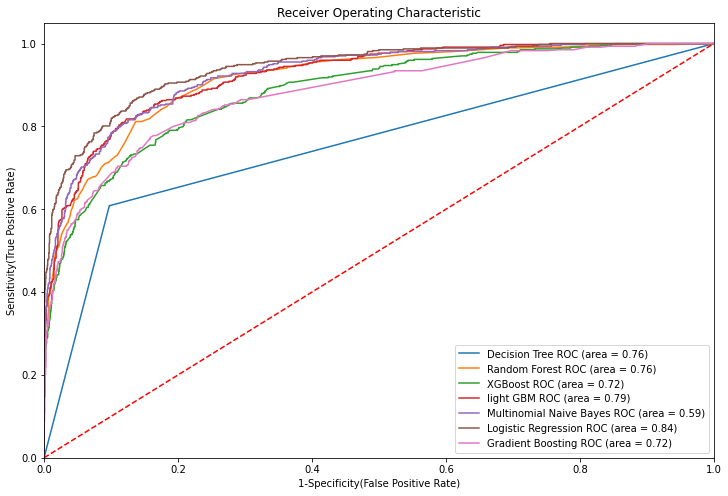

In [41]:
plt.figure(figsize=[12,8])
for m in models:
    model = m['model'] # select the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc_s = roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc_c))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

##**K-Fold CV for best Models**

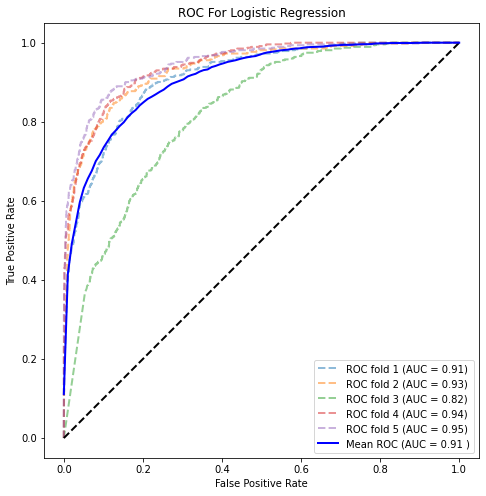

In [52]:
def roc_plotting(model,model_name):
  cv = StratifiedKFold(n_splits=5)

  fig1 = plt.figure(figsize=[14,8])
  ax1 = fig1.add_subplot(111,aspect = 'equal')
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X,y):
      model.fit(X[train],y[train])
      prediction = model.predict_proba(X[test])
      fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=2, alpha=0.5, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc),linestyle = '--')
      i= i+1
  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC For {model_name}')
  plt.legend(loc="lower right")
roc_plotting(logr,"Logistic Regression")

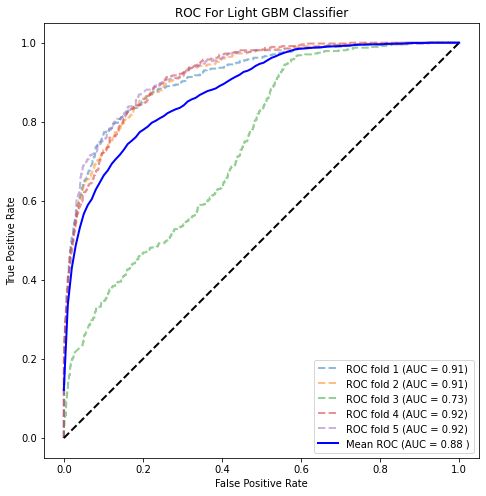

In [53]:
roc_plotting(lgb,"Light GBM Classifier")